## ニューラルネットワーク

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split

np.random.seed(20160614)
tf.set_random_seed(20160614)

In [2]:
#snssns..set_styleset_sty ('whitegrid')
%matplotlib inline

pd.set_option("display.max_columns", 200) # 表示カラムの最大値
pd.set_option('display.max_rows', 200) # 表示行数の最大値
pd.set_option('display.max_colwidth', 30)
pd.set_option("display.float_format", '{:.3f}'.format) # 小数点以下の有効数字

# jupyterの幅を自動調整
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### データ読み込み

In [3]:
df = pd.read_csv('../01.data/02.train/data_2011_2017.csv', index_col=0)

In [4]:
# 学習データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:df.shape[1]], 
                                                    df['target'], 
                                                    test_size=0.3, 
                                                    random_state=42)
# TensorFlow用に変換
X_train = X_train.as_matrix()
y_train = y_train.as_matrix().reshape([len(y_train), 1])
X_test = X_test.as_matrix()
y_test = y_test.as_matrix().reshape([len(y_test), 1])

### モデル定義

In [5]:
NUM_UNITS = 20 #　隠れ層のユニット数
NUM_VARS = df.shape[1] - 1 # 説明変数の数
mult = X_train.flatten().mean() # バイアスの初期値に利用する

x = tf.placeholder(shape=[None, NUM_VARS], dtype=tf.float32) # 説明変数
y = tf.placeholder(shape=[None,1], dtype=tf.float32) #目的変数

In [6]:
# 隠れ層を定義
w1 = tf.Variable(tf.truncated_normal([NUM_VARS, NUM_UNITS]))
b1 = tf.Variable(tf.zeros([NUM_UNITS]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult)

# 出力層を定義
w0 = tf.Variable(tf.zeros([NUM_UNITS, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult)

**[SNE-05]** 誤差関数 loss、トレーニングアルゴリズム train_step、正解率 accuracy を定義します。

In [7]:
loss = -tf.reduce_sum(y*tf.log(p) + (1-y)*tf.log(1-p))
# 最適化関数
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
# 正解率
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(y-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[SNE-06]** セッションを用意して、Variableを初期化します。

In [8]:
sess = tf.Session()

**[SNE-07]** パラメーターの最適化を1000回繰り返します。

In [23]:
# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

i = 0
loss_vec_train = []
loss_vec_test = []

for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict={x: X_train, y: y_train})
    
    if i % 10 == 0:
        #　トレーニングセットの損失値を保存
        acc_val = sess.run( accuracy, feed_dict={x: X_train, y: y_train})
        loss_vec_train.append(acc_val)        
        # テストセットの損失値を保存
        acc_val = sess.run( accuracy, feed_dict={x: X_test, y: y_test})
        loss_vec_test.append(acc_val)
    
    if i % 100 == 0:
        loss_val, acc_val = sess.run( [loss, accuracy], feed_dict={x: X_train, y: y_train})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 476.121948, Accuracy: 0.855611
Step: 200, Loss: 462.707642, Accuracy: 0.855611
Step: 300, Loss: 444.476135, Accuracy: 0.855611
Step: 400, Loss: 452.298462, Accuracy: 0.854786
Step: 500, Loss: 445.232605, Accuracy: 0.860561
Step: 600, Loss: 438.476501, Accuracy: 0.863036
Step: 700, Loss: 431.601257, Accuracy: 0.864686
Step: 800, Loss: 424.908722, Accuracy: 0.871287
Step: 900, Loss: 418.237549, Accuracy: 0.875413
Step: 1000, Loss: 410.427307, Accuracy: 0.876238
Step: 1100, Loss: 401.693237, Accuracy: 0.878713
Step: 1200, Loss: 393.851379, Accuracy: 0.882013
Step: 1300, Loss: 387.323090, Accuracy: 0.879538
Step: 1400, Loss: 381.828339, Accuracy: 0.880363
Step: 1500, Loss: 376.831329, Accuracy: 0.886139
Step: 1600, Loss: 371.808105, Accuracy: 0.883663
Step: 1700, Loss: 366.680115, Accuracy: 0.891914
Step: 1800, Loss: 361.406372, Accuracy: 0.891089
Step: 1900, Loss: 355.986908, Accuracy: 0.896865
Step: 2000, Loss: 350.503113, Accuracy: 0.898515


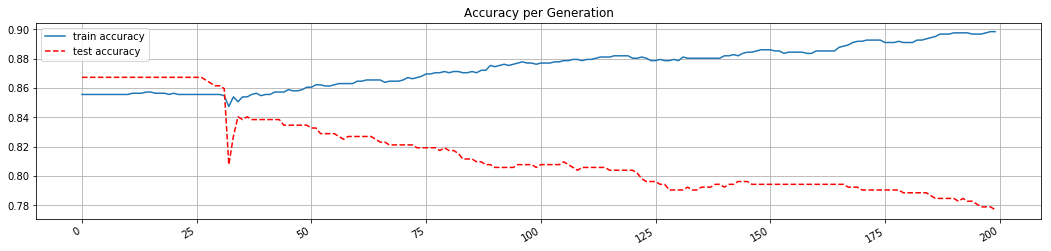

In [25]:
fig = plt.figure(figsize=(18, 4))
ax = plt.subplot()

plt.plot(loss_vec_train,   label='train accuracy')
plt.plot(loss_vec_test,  'r--',  label='test accuracy' )
plt.title('Loss (MSE ) per Generation')

ax.grid() #グリッド表示
fig.autofmt_xdate() #x軸のオートフォーマット
plt.legend() # 凡例の表示
plt.title('Accuracy per Generation')
plt.show()